In [41]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('data/tips.xls')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [7]:
df.total_bill.max()

50.81

<AxesSubplot:>

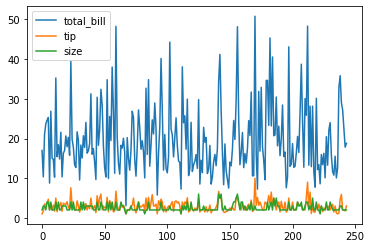

In [10]:
df.plot()

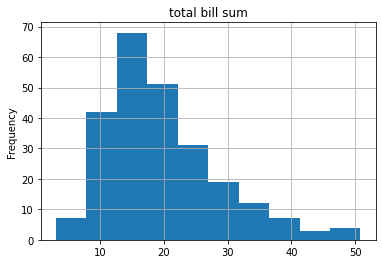

In [15]:
df.total_bill.plot(kind='hist', grid=True, title='total bill sum');

In [16]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:title={'center':'# of visitors per day'}>

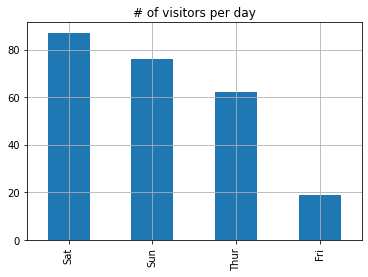

In [19]:
df.day.value_counts().plot(kind='bar', 
                           grid=True, 
#                            colormap='coolwarm', 
                           title='# of visitors per day')

<AxesSubplot:xlabel='sex,smoker'>

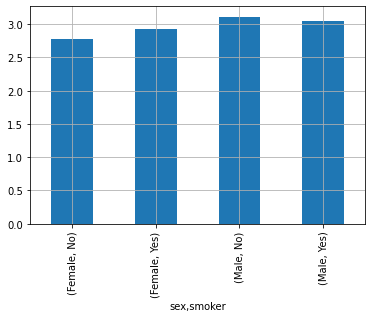

In [21]:
df.groupby(['sex', 'smoker']).tip.mean().plot(kind='bar', grid=True)

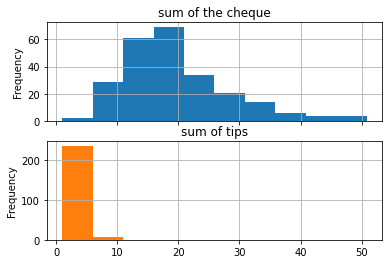

In [25]:
df[['total_bill', 'tip']].plot(
    kind='hist',
    subplots=True,
    title=['sum of the cheque', 'sum of tips'],
    legend=False, 
    grid=True
);

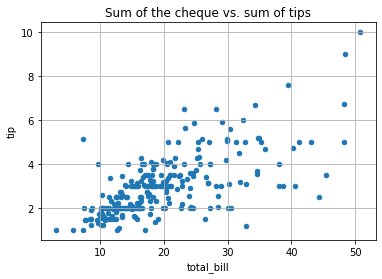

In [27]:
df.plot(
    kind='scatter',
    x='total_bill',
    y='tip',
    grid=True,
    title='Sum of the cheque vs. sum of tips'
);

<AxesSubplot:xlabel='day'>

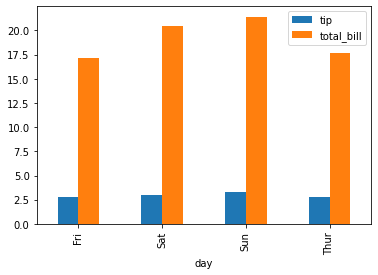

In [34]:
df.pivot_table(values=['total_bill', 'tip'], index='day', aggfunc='mean').plot(kind='bar')

In [29]:
df.groupby('day')[['tip', 'total_bill']].mean()

,tip,total_bill
day,,
Fri,2.734737,17.151579
Sat,2.993103,20.441379
Sun,3.255132,21.410000
Thur,2.771452,17.682742


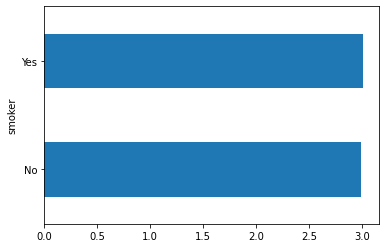

In [40]:
# Какой вариант кода лучше всего подходит для построения графика, отображающего среднюю сумму чаевых, 
# которые оставляют курящие и некурящие посетители?
df.pivot_table(values='tip', aggfunc='mean', index='smoker').plot(kind='barh', legend=False);

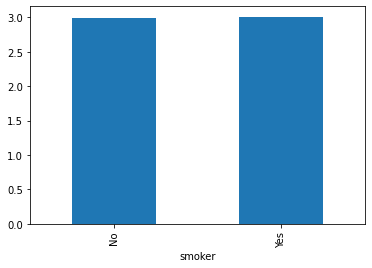

In [39]:
df.groupby('smoker').tip.mean().plot(kind='bar', legend=False);

# MATPLOTLIB
### OOP approach

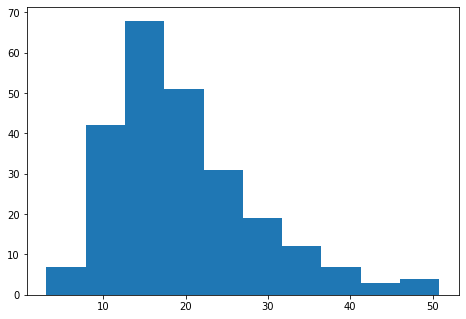

In [46]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill']);

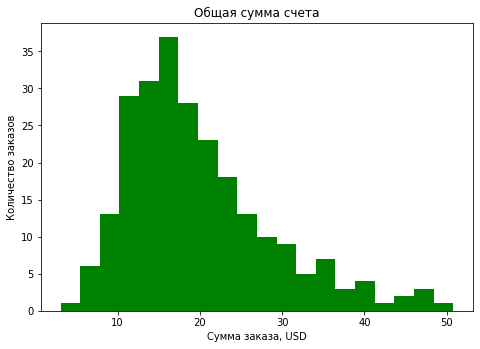

In [48]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'], bins = 20, color = 'green')
axes.set_title('Общая сумма счета')
axes.set_ylabel('Количество заказов')
axes.set_xlabel('Сумма заказа, USD');

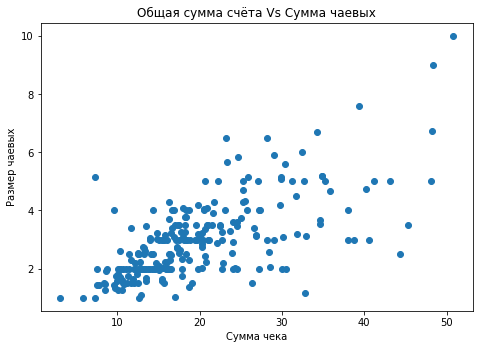

In [49]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x = df['total_bill'], y = df['tip'], marker = 'o')
axes.set_title('Общая сумма счёта Vs Cумма чаевых')
axes.set_xlabel('Сумма чека')
axes.set_ylabel('Размер чаевых');

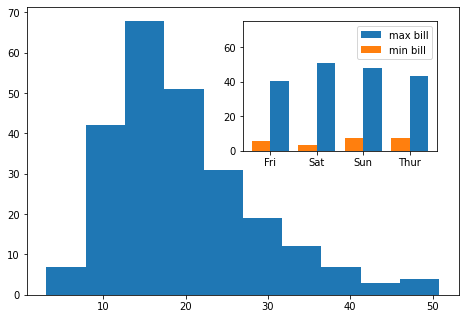

In [106]:
fig = plt.figure()
main_axes = fig.add_axes([0,0,1,1])
insert_axes = fig.add_axes([0.5, 0.5, 0.45, 0.45])
main_axes.hist(df['total_bill'])
data = df.groupby(by = 'day')['total_bill'].agg(['min','max']).reset_index()
insert_axes.bar(x=data.day, height=data['max'], width = 0.4, align = 'edge', label='max bill')
insert_axes.bar(x=data.day, height=data['min'], width = -0.4, align = 'edge', label='min bill')
insert_axes.set_ylim(0, 75)
insert_axes.legend(loc = 0);